#Лабораторная 1. Фабарисов Дмитрий

In [45]:
import skimage.io as sk
import numpy as np
import os
import matplotlib.pyplot as plt
import copy as cp
 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [46]:
def show_pic(pic_list, name = ['picture', 'picture'], figsize_ = (16, 10)):
    fig = figure(figsize = figsize_)
    for idx in range(len(pic_list)):
        subplot = fig.add_subplot(1, len(pic_list), idx+1)
        sk.imshow(pic_list[idx])
        subplot.set_title(name[idx])

##1. Читаем изображение

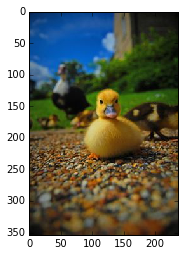

In [47]:
pic = skimage.io.imread('duckling.png')[:, :, :3]
sk.imshow(pic)

## 2. Режем на части и сохраняем

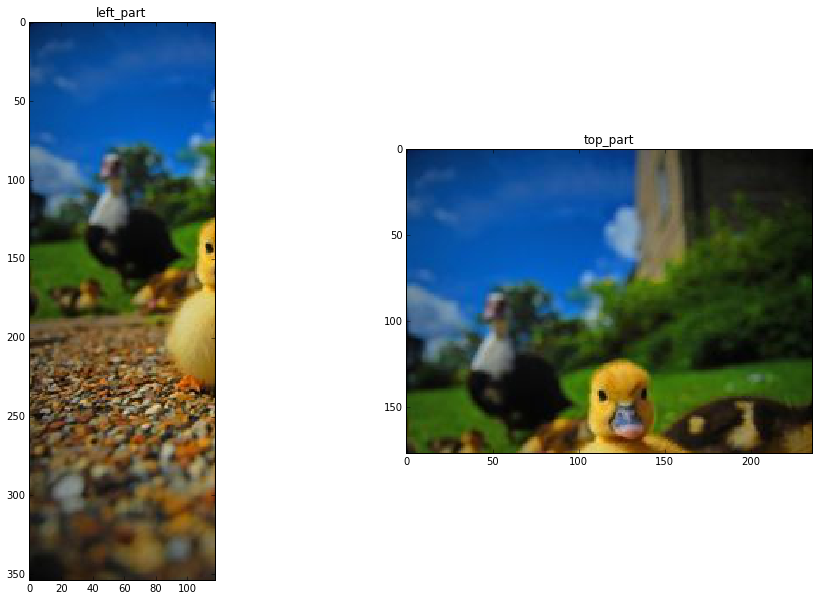

In [48]:
left_part = pic[:,0 : pic.shape[1] / 2,:]
top_part = pic[0 : pic.shape[0] / 2,:,:]
show_pic([left_part, top_part], ['left_part', 'top_part'])

In [49]:
matplotlib.pyplot.imsave('left.png', left_part)
matplotlib.pyplot.imsave('top.png', top_part)

##3. Отдельные изображения каждого RGB канала

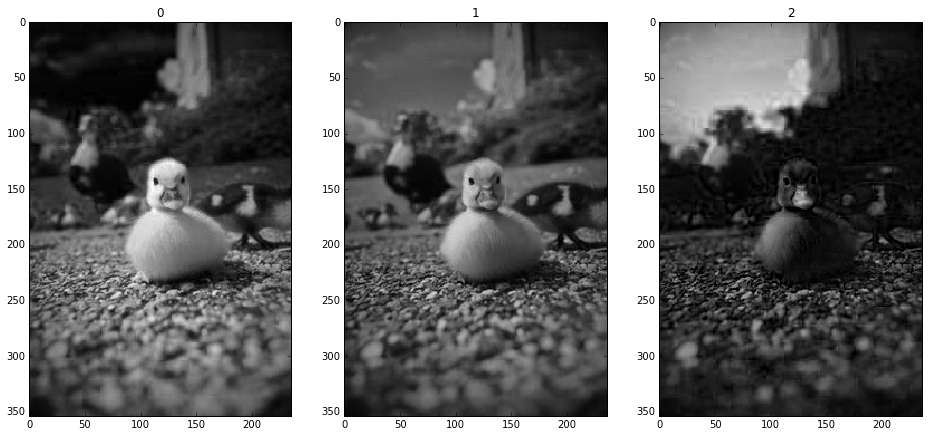

In [50]:
fig = figure(figsize = (16, 6))
pics = list()

for channel in range(3):
    pics.append(pic[:,:,channel])
show_pic(pics, ['0', '1', '2'])

## А теперь в цвете

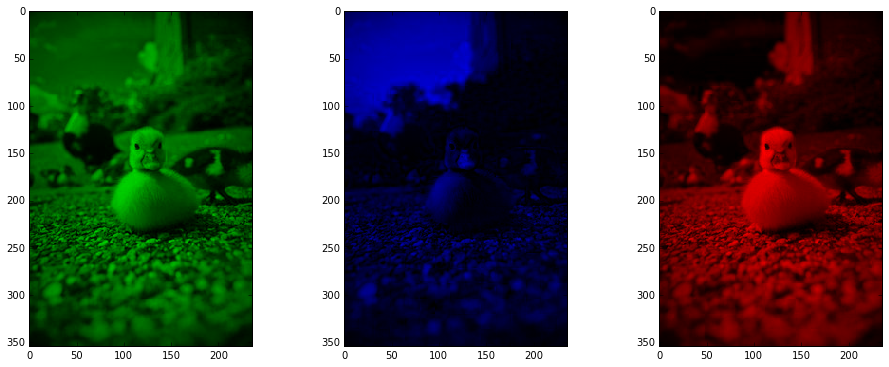

In [51]:
fig = figure(figsize = (16, 6))
one_color_pic = []
for color in range(3):
    new_pic = cp.copy(pic)
    new_pic[:, :, (color + 1) % 3] = 0
    new_pic[:, :, (color + 2) % 3] = 0
    subplot = fig.add_subplot(1, 3, color)
    sk.imshow(new_pic)

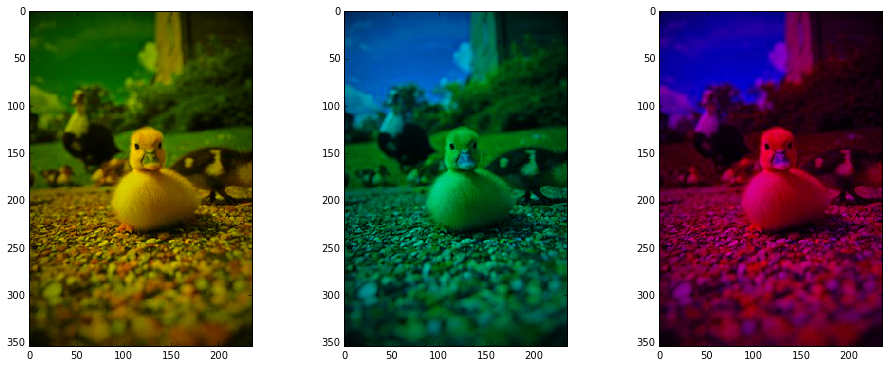

In [52]:
fig = figure(figsize = (16, 6))
one_color_pic = []
for color in range(3):
    new_pic = cp.copy(pic)
    new_pic[:, :, (color + 1) % 3] = 0
    subplot = fig.add_subplot(1, 3, color)
    sk.imshow(new_pic)

## Усредненное по каналам изображение и сконвертированное

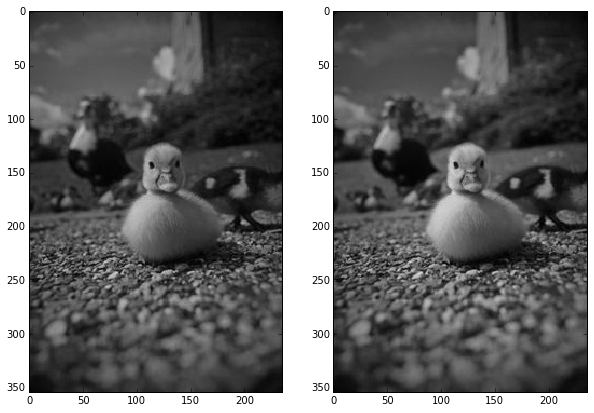

In [53]:
fig = figure(figsize = (10, 16))
grey = np.mean(pic, axis = 2) / 255
fig.add_subplot(1, 2, 1)
sk.imshow(grey)
fig.add_subplot(1, 2, 2)
gray_pic = skimage.color.rgb2gray(pic)
sk.imshow(gray_pic)

#### Сконвертированное изображение лучше, ибо не зря разработчики подирали константы суммирования по различным каналам

## 5. Конвертация из RGB в HSV

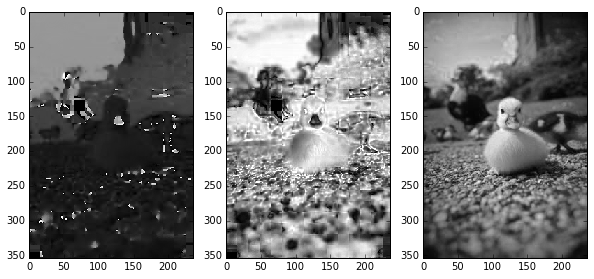

In [54]:
pic_hsv = skimage.color.rgb2hsv(pic)
fig = figure(figsize = (10, 16))
for idx in range(3):
    fig.add_subplot(1,3, idx + 1)
    sk.imshow(pic_hsv[:, :, idx])

## 6. Утенок в негативе

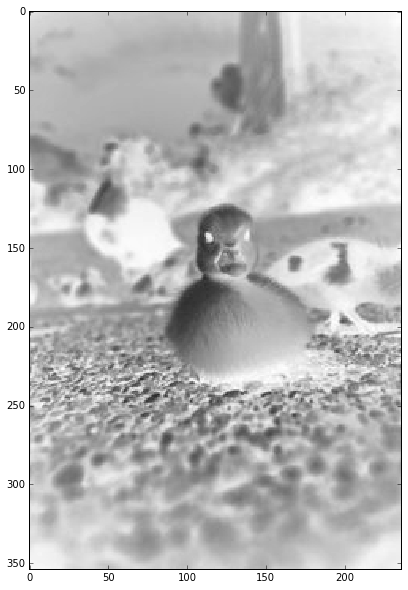

In [55]:
figure(figsize = (20, 10))
negative_pic = np.array([[1 - x for x in row] for row in gray_pic])
sk.imshow(negative_pic)

## 7. Изображение утенка в зеркале

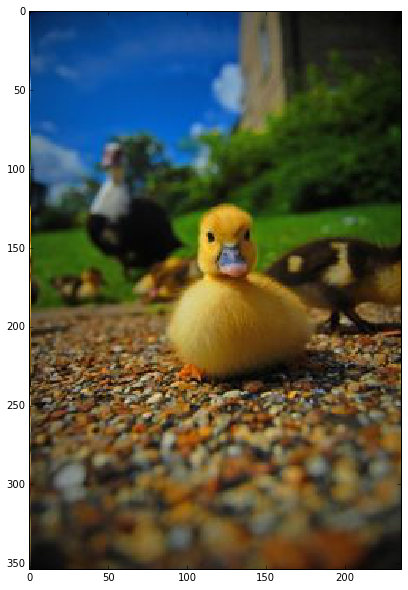

In [56]:
figure(figsize = (20, 10))

mirrow_pic = cp.deepcopy(pic)
width = pic.shape[1]
for col in range(width//2):
    mirrow_pic[:, [col, width - column - 1], :] = mirrow_pic[:, [width - column - 1, col], :]
sk.imshow(mirrow_pic)

## 8. Размер изображения

In [57]:
os.stat("duckling.png").st_size

145000